- 残差的概念在集成算法中有人用过，就是GradientBoosting算法中的思想。
    - 学习过程中学习残差分类器，使用残差作为作为训练数据，训练残差分类器。所有残差分类器最后集成是最好的分类器。

- 残差与误差的概念
    1. 残差：**测量值** & **预测值** 之间的差异
    2. 误差：**测量值** & **真实值** 之间的差异

# 关于ResNet残差网络

- ResNet是2015年的ImageNet竞赛的冠军，由微软研究院何凯明，张翔宇，任少卿，孙剑等共同提出，通过引入residual block能够成功地训练高达152层的神经网络。
    - 残差网络从残差的角度，解决了深度神经网络的退化问题。

## 网络退化

- 网络退化：
    - 网络退化是指深度神经网络冗余造成的。
        1. **网络冗余**：是指本来50层的网络可以达到最大优化，但实际设计的时候设计了100层网络，其中后面的50层就是冗余层（因为梯度消失的缘故造成的）。更关键是我们设计网络的时候也不知道到底多少层为最优网络结构，所以网络冗余是必然发生的。
        2. **网络退化**：网络退化不是指过拟合，而是指按照深度脑神经网络的设计，就算后面的神经网络层是冗余的，但是训练可以保证冗余的神经层被训练成恒等层（输入与输出完全一样），但实际上网络没有棒法训练出恒等层，这种现象就是**退化现象**（所谓退化现象就是无法训练出恒等层的情况）

## 残差网络的思想

- 传统网络如果出现冗余层，实际是训练一个权重使得这层的满足输入等于输出，假设这种使用函数$h$表示，就是$h(x)= x $。这种训练方式比较难，

- 残差网络换一种思维模式，设计一种网络形式：$h(x) = x + F(x)$，训练$F(x) = 0$。
    - why：$F(x)=0$，因为权重初始化一般以0为中心取Gauss随机分布或者均匀分布，把权重训练为0，比训练$h(x) = x$的权重系数容易得多。
    - $F(x)$称为残差，就是残差项。

1. 传统训练示意图

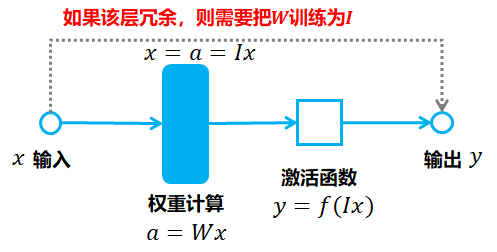

2. 残差训练示意图

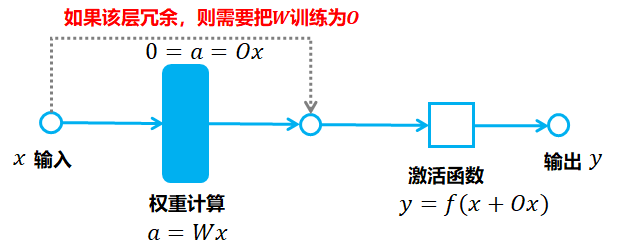

- 现在的重点就是怎么设计残差项。

## 残差项（残差块）设计

- 残差项替换为恒等项的思维方式就是就是残差网络的设计核心。
    - ResNet使用卷积层作为残差项，而且是两层。
        - $F(x) = W_2 \sigma (W_1x)$
    - 实际上在计算的时候，就是跳跃计算，每隔2层的输出：
        - $y =\sigma(F(x) + x)$

- 下面使用跳跃的方式来表达残差网络

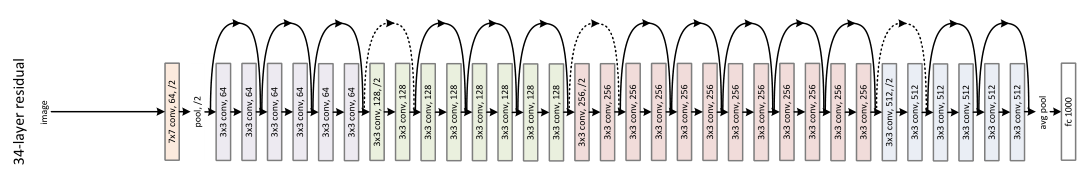

- 不同层数的残差网络设计

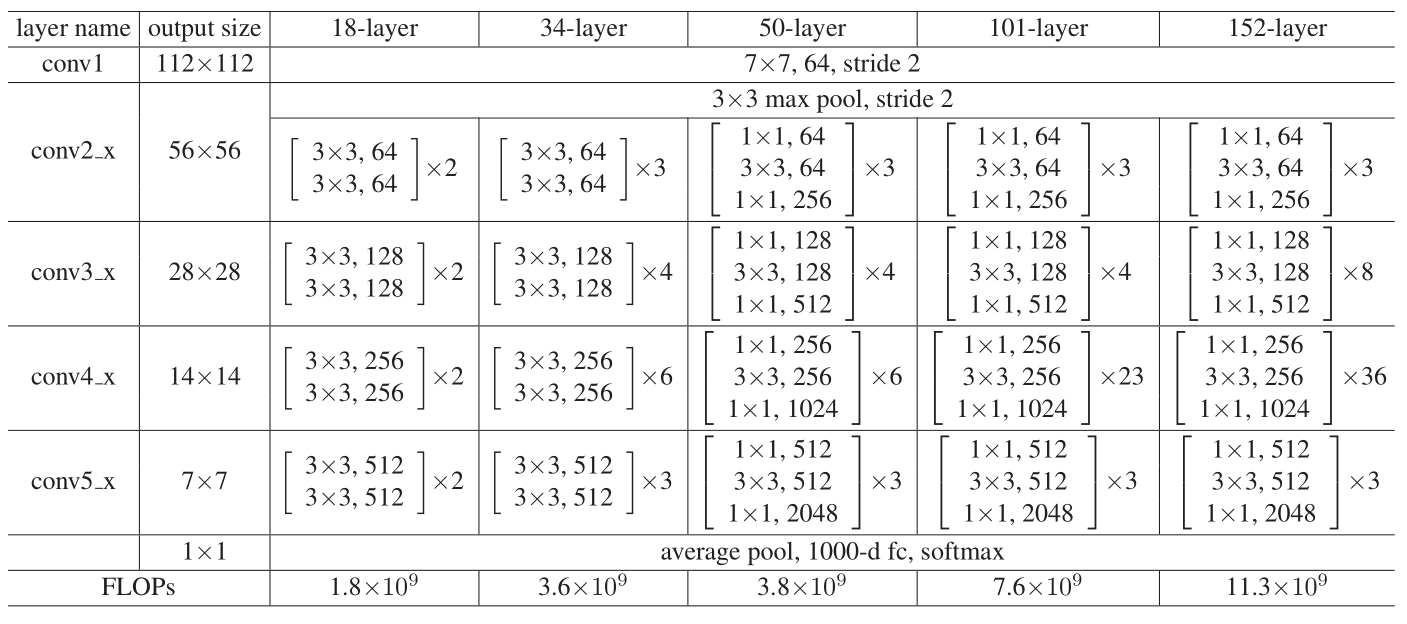

- 输入图像的大小：
    - $224 \times 224 \times 3$或者 $224 \times 224 \times 1$

- 所有的残差网络前后各有一个公共层：
    - 公共层前：
        - 输入大小：$\color{red}{224 \times 224 \times 3}$
        - 卷积层：$kernel = 7 \times 7, channel= 64 ,stride = 2$
        - 最大池化层，$kernel = 3 \times 3, stride = 2$
        - 输出大小: $\color{blue}{112 \times 112 \times 64}$
    - 公共层后-全连接层：
        - 均值池化
        - $1000-d$全连接
    - 输出函数：
        - softmax

- 下面以18层残差网络为例说明，其他层数的残差网络类似。

### 18层残差网络设计

1. 残差层（数量2）
    - 残差层-1
        - 输入： $\color{red}{112 \times 112 \times 64}$
        - 参数1：$kernel = 3 \times 3, channel = 64, stride = 2$
        - 中间输出： $\color{green}{56 \times 56 \times 64}$
        - 参数2：$kernel = 3 \times 3, channel = 64, stride = 1$
        - 输出：$\color{blue}{56 \times 56 \times 64}$
    - 残差层-2
        - 输入： $\color{red}{56 \times 56 \times 64}$
        - 参数1：$kernel = 3 \times 3, channel = 64, stride = 1$
        - 参数2：$kernel = 3 \times 3, channel = 64, stride = 1$
        - 输出：$\color{blue}{56 \times 56 \times 64}$

2. 残差层（数量2）
    - 残差层-1
        - 输入： $\color{red}{56 \times 56 \times 64}$
        - 参数1：$kernel = 3 \times 3, channel = 128, stride = 2$
        - 中间输出： $\color{green}{28 \times 28 \times 128}$
        - 参数2：$kernel = 3 \times 3, channel = 128, stride = 1$
        - 输出：$\color{blue}{28 \times 28 \times 128}$
    - 残差层-2
        - 输入： $\color{red}{28 \times 28 \times 128}$
        - 参数1：$kernel = 3 \times 3, channel = 128, stride = 1$
        - 参数2：$kernel = 3 \times 3, channel = 128, stride = 1$
        - 输出：$\color{blue}{28 \times 28 \times 128}$

3. 残差层（数量2）
    - 残差层-1
        - 输入： $\color{red}{28 \times 28 \times 128}$
        - 参数1：$kernel = 3 \times 3, channel = 256, stride = 2$
        - 中间输出： $\color{green}{14 \times 14 \times 256}$
        - 参数2：$kernel = 3 \times 3, channel = 256, stride = 1$
        - 输出：$\color{blue}{14 \times 14 \times 256}$
    - 残差层-2
        - 输入： $\color{red}{14 \times 14 \times 256}$
        - 参数1：$kernel = 3 \times 3, channel = 256, stride = 1$
        - 参数2：$kernel = 3 \times 3, channel = 256, stride = 1$
        - 输出：$\color{blue}{14 \times 14 \times 256}$

4. 残差层2（数量4个卷积层）
    - 残差层-1
        - 输入： $\color{red}{14 \times 14 \times 256}$
        - 参数1：$kernel = 3 \times 3, channel = 512, stride = 2$
        - 中间输出： $\color{green}{7 \times 7 \times 512}$
        - 参数2：$kernel = 3 \times 3, channel = 512, stride = 1$
        - 输出：$\color{blue}{7 \times 7 \times 512}$
    - 残差层-2
        - 输入： $\color{red}{7 \times 7 \times 512}$
        - 参数1：$kernel = 3 \times 3, channel = 512, stride = 1$
        - 参数2：$kernel = 3 \times 3, channel = 512, stride = 1$
        - 输出：$\color{blue}{7 \times 7 \times 512}$

5. 下采样
    - 当 $x + F(x)$的时候，$x$与$F(x)$不同型，需要对$x$下采样后与$F(x)$同型。
    - ResNet采用的下采样使用的是卷积下采样降维。

- 提示
    - 其实全连接神经网络也可以设计为残差网络。

# 残差网络的实现

## 官方实现

- Torch官方实现了ResNet网络，该实现在torchvision.models模块中。

In [1]:
from torchvision.models import resnet18, resnet34, resnet50, resnet101, resnet152
from torchsummary import summary
net = resnet18()
# print(net)
# print("=========================================================")
# 输出网络结构
print(summary(net,input_size=(3, 224, 224), device='cpu'))
# print("=========================================================")
# # 输出网络结构
# print(summary(net.cuda(),input_size=(3, 224, 224)))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 112, 112]           9,408
       BatchNorm2d-2         [-1, 64, 112, 112]             128
              ReLU-3         [-1, 64, 112, 112]               0
         MaxPool2d-4           [-1, 64, 56, 56]               0
            Conv2d-5           [-1, 64, 56, 56]          36,864
       BatchNorm2d-6           [-1, 64, 56, 56]             128
              ReLU-7           [-1, 64, 56, 56]               0
            Conv2d-8           [-1, 64, 56, 56]          36,864
       BatchNorm2d-9           [-1, 64, 56, 56]             128
             ReLU-10           [-1, 64, 56, 56]               0
       BasicBlock-11           [-1, 64, 56, 56]               0
           Conv2d-12           [-1, 64, 56, 56]          36,864
      BatchNorm2d-13           [-1, 64, 56, 56]             128
             ReLU-14           [-1, 64,

## 手工实现

- 依然使用18层为例子

- 实现思路：
    - 按照残差块->残差层->残差网络来实现；
        - 残差层由残差块构成（第一个块降维使用）
        - 残差一般第一个会降维。
    - 然后使用残差块堆砌成残差网络。

- 实现施工图

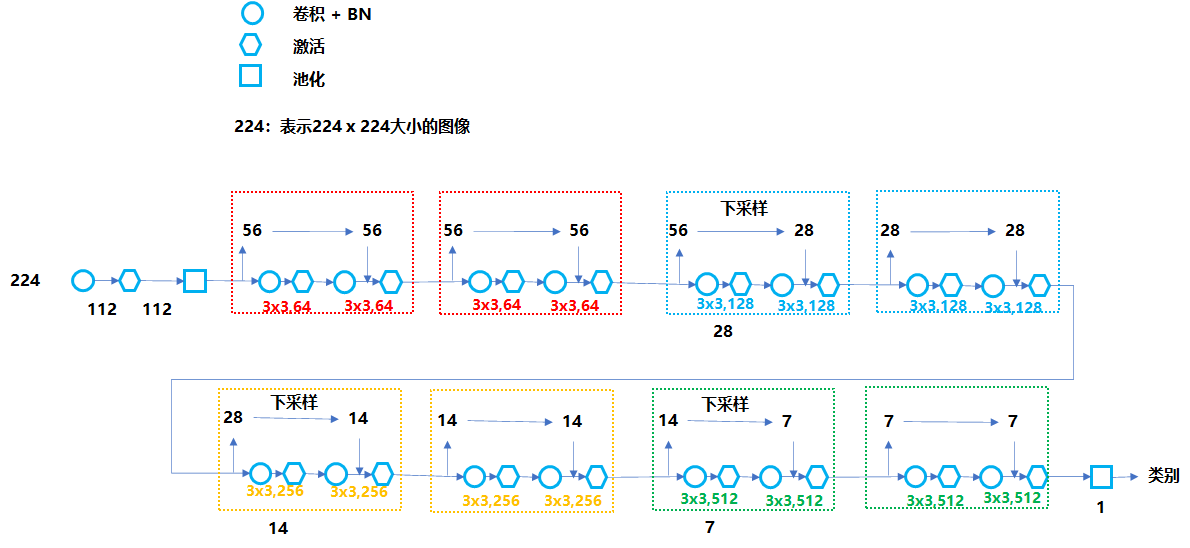

- 下采样主要降维：
    - 降维方式很多，我们这里采用卷积+BN（可以增加BN也可以省略）

### 残差块实现

In [2]:
from torch.nn import Module, Conv2d, BatchNorm2d, MaxPool2d, ReLU, Sequential, AdaptiveAvgPool2d, Linear

# 残差块
class ResBlock(Module):
    def __init__(self, input_channels, ouput_channels, stride=1, downsample=None):
        super(ResBlock, self).__init__()
        # 第一个卷积
        self.conv_1 = Conv2d(in_channels=input_channels, out_channels=ouput_channels, kernel_size=3, stride=stride, padding=1, bias=False)
        self.bn_1 = BatchNorm2d(ouput_channels)
        
        # 第一个激活函数
        self.relu_1 = ReLU(inplace=True)
        
        # 第二个卷积
        self.conv_2 = Conv2d(in_channels=ouput_channels,out_channels=ouput_channels,kernel_size=3,stride=1, padding=1, bias=False)
        self.bn_2 = BatchNorm2d(ouput_channels)
        
        # 是否需要采样
        self.downsample = downsample
        
        # 第二个激活函数
        self.relu_2 = ReLU(inplace=True)
        
    def forward(self, x):
        identity = x     # 这个值在 x + F（x）中根据F(x)的形状需要下采样，这样才能对齐
        
        # 第一层计算
        y = self.conv_1(x)
        y = self.bn_1(y)
        y = self.relu_1(y)
        
        # 第二层
        y = self.conv_2(y)
        y = self.bn_2(y)
        
        
        # 判定是否需要下采样
        if self.downsample:
            identity = self.downsample(x)
        
        y += identity     # x + F(x)残差形式输出
        y = self.relu_2(y)
        return y
        

- 查看残差块的结构 - 无下采样

In [3]:
from torchsummary import summary
block = ResBlock(64, 64, stride=1)
print(summary(block,input_size=(64, 56, 56), device='cpu'))


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 56, 56]          36,864
       BatchNorm2d-2           [-1, 64, 56, 56]             128
              ReLU-3           [-1, 64, 56, 56]               0
            Conv2d-4           [-1, 64, 56, 56]          36,864
       BatchNorm2d-5           [-1, 64, 56, 56]             128
              ReLU-6           [-1, 64, 56, 56]               0
Total params: 73,984
Trainable params: 73,984
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.77
Forward/backward pass size (MB): 9.19
Params size (MB): 0.28
Estimated Total Size (MB): 10.24
----------------------------------------------------------------
None


- 查看残差块的结构 - 下采样
    - 多出一个下采样层（使用的是卷积下采样）

In [4]:
from torchsummary import summary
from torch.nn import Module, Conv2d, BatchNorm2d, MaxPool2d, ReLU, Sequential, AdaptiveAvgPool2d, Linear

downsample = Sequential( 
    Conv2d(64, 128, kernel_size=3, stride=2, padding=1, bias=False), 
    BatchNorm2d(128)
)


block = ResBlock(64, 128, stride=2, downsample=downsample)
print(summary(block,input_size=(64, 56, 56), device='cpu'))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1          [-1, 128, 28, 28]          73,728
       BatchNorm2d-2          [-1, 128, 28, 28]             256
              ReLU-3          [-1, 128, 28, 28]               0
            Conv2d-4          [-1, 128, 28, 28]         147,456
       BatchNorm2d-5          [-1, 128, 28, 28]             256
            Conv2d-6          [-1, 128, 28, 28]          73,728
       BatchNorm2d-7          [-1, 128, 28, 28]             256
              ReLU-8          [-1, 128, 28, 28]               0
Total params: 295,680
Trainable params: 295,680
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.77
Forward/backward pass size (MB): 6.12
Params size (MB): 1.13
Estimated Total Size (MB): 8.02
----------------------------------------------------------------
None


- 上面例子：
    - 输入： $x = (channels = 64, dimension = 56 \times 56)$
    - $F(x) = (channels =128, 28 \times 28)$
    - $x$必须下采样为 $ (channels =128, 28 \times 28)$
         - 注意：这类通道也需要处理，所以使用卷积是比较好的选择。

### 堆砌实现ResNet网络

In [6]:
import torch
from torch.nn import Module, Conv2d, BatchNorm2d, MaxPool2d, ReLU, Sequential, AdaptiveAvgPool2d, Linear

from torch.nn import Module, Conv2d, BatchNorm2d, MaxPool2d, ReLU, Sequential, AdaptiveAvgPool2d, Linear

# 残差块
class YQResBlock(Module):
    def __init__(self, input_channels, ouput_channels, stride=1, downsample=None):
        super(YQResBlock, self).__init__()
        # 第一个卷积
        self.conv_1 = Conv2d(in_channels=input_channels, out_channels=ouput_channels, kernel_size=3, stride=stride, padding=1, bias=False)
        self.bn_1 = BatchNorm2d(ouput_channels)
        
        # 第一个激活函数
        self.relu_1 = ReLU(inplace=True)
        
        # 第二个卷积
        self.conv_2 = Conv2d(in_channels=ouput_channels,out_channels=ouput_channels,kernel_size=3,stride=1, padding=1, bias=False)
        self.bn_2 = BatchNorm2d(ouput_channels)
        
        # 是否需要采样
        self.downsample = downsample
        
        # 第二个激活函数
        self.relu_2 = ReLU(inplace=True)
        
    def forward(self, x):
        identity = x     # 这个值在 x + F（x）中根据F(x)的形状需要下采样，这样才能对齐
        
        # 第一层计算
        y = self.conv_1(x)
        y = self.bn_1(y)
        y = self.relu_1(y)
        
        # 第二层
        y = self.conv_2(y)
        y = self.bn_2(y)
        
        
        # 判定是否需要下采样
        if self.downsample:
            identity = self.downsample(identity)
        
        y += identity     # x + F(x)残差形式输出
        y = self.relu_2(y)
        return y
        
        
class YQResNet(Module):
    """
        cls_num:是分类的种类，输出的分类向量长度。
    """
    def __init__(self, cls_num=1000):
        super(YQResNet, self).__init__()
        # 一、ResNet的头（一个卷积 + 池化）
        in_channels = 3
        self.header_conv = Conv2d(in_channels, 64, kernel_size=7,  stride=2, padding=3, bias=False)   # 输入图像通道3，输出的64看ResNet的18层设计
        self.header_bn = BatchNorm2d(64)
        self.header_relu = ReLU(inplace=True)
        
        self.header_pool = MaxPool2d(kernel_size=3, stride=2, padding=1)  # padding补齐一般是kernel的一半。
        # 二、ResNet的残差层（4个残差层 = 4 * 2 * 2 = 16卷积层）
        # 2.1 残差层
        self.res_layer_1_1 = YQResBlock(64, 64, stride=1)
        self.res_layer_1_2 = YQResBlock(64, 64, stride=1)
        
        # 2.2 残差层
        downsample_1 = Sequential(    # 不能定义为成员，否则参数会被跟踪
            Conv2d(64, 128, kernel_size=3, stride=2, padding=1, bias=False), 
            BatchNorm2d(128)
        )
        self.res_layer_2_1 = YQResBlock(64, 128, stride=2, downsample=downsample_1)
        self.res_layer_2_2 = YQResBlock(128, 128, stride=1)
        
        # 2.3 残差层
        downsample_2 = Sequential( 
            Conv2d(128, 256, kernel_size=3, stride=2, padding=1, bias=False), 
            BatchNorm2d(256)
        )
        self.res_layer_3_1 = YQResBlock(128, 256, stride=2, downsample=downsample_2)
        self.res_layer_3_2 = YQResBlock(256, 256, stride=1)
        
        # 2.4 残差层
        downsample_3 = Sequential( 
            Conv2d(256, 512, kernel_size=3, stride=2, padding=1, bias=False), 
            BatchNorm2d(512)
        )
        self.res_layer_4_1 = YQResBlock(256, 512, stride=2, downsample=downsample_3)
        self.res_layer_4_2 = YQResBlock(512, 512, stride=1)
        
        # 三、ResNet的尾（一个池化 + 全连接）
        self.footer_pool = AdaptiveAvgPool2d((1, 1))   # 采用自适应池化
        self.classifier = Linear(512 , cls_num)
        
    def forward(self, x):
        y = self.header_conv(x)
        y = self.header_bn(y)
        y = self.header_relu(y)
        y = self.header_pool(y)
        
        y = self.res_layer_1_1(y)
        y = self.res_layer_1_2(y)
        
        y = self.res_layer_2_1(y)
        y = self.res_layer_2_2(y)
        
        y = self.res_layer_3_1(y)
        y = self.res_layer_3_2(y)
        
        y = self.res_layer_4_1(y)
        y = self.res_layer_4_2(y)
        
        y = self.footer_pool(y)
        # 格式化
        y = torch.flatten(y, 1)
        y = self.classifier(y)
        return y

- 查看我们构建的残差网络YQResNet

In [7]:
from torchsummary import summary
from torch.nn import Module, Conv2d, BatchNorm2d, MaxPool2d, ReLU, Sequential, AdaptiveAvgPool2d, Linear


yq_net = YQResNet()
print(summary(yq_net,input_size=(3, 224, 224), device='cpu'))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 112, 112]           9,408
       BatchNorm2d-2         [-1, 64, 112, 112]             128
              ReLU-3         [-1, 64, 112, 112]               0
         MaxPool2d-4           [-1, 64, 56, 56]               0
            Conv2d-5           [-1, 64, 56, 56]          36,864
       BatchNorm2d-6           [-1, 64, 56, 56]             128
              ReLU-7           [-1, 64, 56, 56]               0
            Conv2d-8           [-1, 64, 56, 56]          36,864
       BatchNorm2d-9           [-1, 64, 56, 56]             128
             ReLU-10           [-1, 64, 56, 56]               0
       YQResBlock-11           [-1, 64, 56, 56]               0
           Conv2d-12           [-1, 64, 56, 56]          36,864
      BatchNorm2d-13           [-1, 64, 56, 56]             128
             ReLU-14           [-1, 64,

- **注意**：
    - 我们实现的18层残差网络与官方的残差网络实现的参数个数有差异 ：
        - 我们的：13,065,768
        - 官方的：11,689,512
    - 差异的原因：
        - 我们在下采样使用的卷积运算的`kernel=3`，官方下采样使用的卷积运算的`kernel=1 * 1`

- 下面是与官方使用的一样：
    - 修改的参数：downsample_1，downsample_2，downsample_3
        - 卷积的核修改为3.
        - 卷积的padding修改为0.

In [8]:
import torch
from torch.nn import Module, Conv2d, BatchNorm2d, MaxPool2d, ReLU, Sequential, AdaptiveAvgPool2d, Linear

class YQResNet_2(Module):
    """
        cls_num:是分类的种类，输出的分类向量长度。
    """
    def __init__(self, cls_num=1000):
        super(YQResNet_2, self).__init__()
        # 一、ResNet的头（一个卷积 + 池化）
        in_channels = 3
        self.header_conv = Conv2d(in_channels, 64, kernel_size=7,  stride=2, padding=3, bias=False)   # 输入图像通道3，输出的64看ResNet的18层设计
        self.header_bn = BatchNorm2d(64)
        self.header_relu = ReLU(inplace=True)
        
        self.header_pool = MaxPool2d(kernel_size=3, stride=2, padding=1)  # padding补齐一般是kernel的一半。
        # 二、ResNet的残差层（4个残差层 = 4 * 2 * 2 = 16卷积层）
        # 2.1 残差层
        self.res_layer_1_1 = YQResBlock(64, 64, stride=1)
        self.res_layer_1_2 = YQResBlock(64, 64, stride=1)
        
        # 2.2 残差层
        downsample_1 = Sequential(    # 不能定义为成员，否则参数会被跟踪
            Conv2d(64, 128, kernel_size=1, stride=2, padding=0, bias=False), 
            BatchNorm2d(128)
        )
        self.res_layer_2_1 = YQResBlock(64, 128, stride=2, downsample=downsample_1)
        self.res_layer_2_2 = YQResBlock(128, 128, stride=1)
        
        # 2.3 残差层
        downsample_2 = Sequential( 
            Conv2d(128, 256, kernel_size=1, stride=2, padding=0, bias=False), 
            BatchNorm2d(256)
        )
        self.res_layer_3_1 = YQResBlock(128, 256, stride=2, downsample=downsample_2)
        self.res_layer_3_2 = YQResBlock(256, 256, stride=1)
        
        # 2.4 残差层
        downsample_3 = Sequential(
            Conv2d(256, 512, kernel_size=1, stride=2, padding=0, bias=False), 
            BatchNorm2d(512)
        )
        self.res_layer_4_1 = YQResBlock(256, 512, stride=2, downsample=downsample_3)
        self.res_layer_4_2 = YQResBlock(512, 512, stride=1)
        
        # 三、ResNet的尾（一个池化 + 全连接）
        self.footer_pool = AdaptiveAvgPool2d((1, 1))   # 采用自适应池化
        self.classifier = Linear(512 , cls_num)
        
    def forward(self, x):
        y = self.header_conv(x)
        y = self.header_bn(y)
        y = self.header_relu(y)
        y = self.header_pool(y)
        
        y = self.res_layer_1_1(y)
        y = self.res_layer_1_2(y)
        
        y = self.res_layer_2_1(y)  # ------
        y = self.res_layer_2_2(y)
        
        y = self.res_layer_3_1(y)  # ------
        y = self.res_layer_3_2(y)
        
        y = self.res_layer_4_1(y)  # ------
        y = self.res_layer_4_2(y)
        
        y = self.footer_pool(y)
        # 格式化
        y = torch.flatten(y, 1)
        y = self.classifier(y)
        return y

In [9]:
from torchsummary import summary
from torchvision.models import resnet18, resnet34, resnet50, resnet101, resnet152
net_1 = resnet18()
# print("=========================================================")
print(summary(net_1, input_size=(3, 224, 224), device='cpu'))
net_2 = YQResNet_2()
# print("=========================================================")
print(summary(net_2, input_size=(3, 224, 224), device='cpu'))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 112, 112]           9,408
       BatchNorm2d-2         [-1, 64, 112, 112]             128
              ReLU-3         [-1, 64, 112, 112]               0
         MaxPool2d-4           [-1, 64, 56, 56]               0
            Conv2d-5           [-1, 64, 56, 56]          36,864
       BatchNorm2d-6           [-1, 64, 56, 56]             128
              ReLU-7           [-1, 64, 56, 56]               0
            Conv2d-8           [-1, 64, 56, 56]          36,864
       BatchNorm2d-9           [-1, 64, 56, 56]             128
             ReLU-10           [-1, 64, 56, 56]               0
       BasicBlock-11           [-1, 64, 56, 56]               0
           Conv2d-12           [-1, 64, 56, 56]          36,864
      BatchNorm2d-13           [-1, 64, 56, 56]             128
             ReLU-14           [-1, 64,

# 训练残差网络

- 使用ImageNet数据集，取其中4个目录（4类别）训练

## 加载数据集的实现

In [7]:
from torchvision.datasets import ImageFolder
from torchvision.transforms import *
from torchvision.transforms.functional import *
from torch.utils.data import random_split
from torch.utils.data import DataLoader

# 加载指定目录下的图像，返回根据切分比例形成的数据加载器
def load_data(img_dir, rate=0.8):
    transform = Compose(
        [
            Resize((224, 224)),          #RandomResizedCrop(227),
    #         RandomHorizontalFlip(),
            ToTensor(),
            Normalize(mean=[0.0, 0.0, 0.0], std=[1.0, 1.0, 1.0]),   # 均值与方差,(这个运算输入必须是Tensor图像，所以需要在ToTensor后)
        ]
    )
    ds = ImageFolder(img_dir, transform=transform)

    l = len(ds)
    l_train = int(l * rate)
    train, test = random_split(ds, [l_train, l - l_train])
    
    train_loader = torch.utils.data.DataLoader(dataset=train, shuffle=True, batch_size=200)   # 100，因为每个类的图像是1300个
    test_loader = torch.utils.data.DataLoader(dataset=test, shuffle=True, batch_size=200)  # 一个批次直接预测

    return train_loader, test_loader

## 训练

In [8]:
# from alexnet import AlexNet
# from dataset import load_data
import torch
import torch.utils.data as Data
import torchvision
import numpy as np
import struct
import cv2

# 1. 加载数据集
print("1. 加载数据集")
train_loader, test_loader = load_data("./imagenet2012", 0.8)

CUDA = torch.cuda.is_available()
# 2. 网络搭建
print("2. 网络搭建")
net=YQResNet(4)
if CUDA:
    net.cuda()

# 3. 训练
print("3. 训练")
optimizer=torch.optim.Adam(net.parameters(),lr=0.001)
loss_F=torch.nn.CrossEntropyLoss()

epoch = 50


for n in range(epoch): # 数据集只迭代一次
    for step, input_data in enumerate(train_loader):
        x_, y_=input_data
        if CUDA:
            # GPU运算 -----------------------------------------------
            x_ = x_.cuda()
            y_ = y_.cuda()
        pred=net(x_.view(-1, 3, 224, 224))  
        loss=loss_F(pred, y_) # 计算loss
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
    with torch.no_grad():
        all_num = 0.0 
        acc = 0.0
        for t_x, t_y in  test_loader:
            all_num  += len(t_y)
            if CUDA:
                t_x = t_x.cuda()
                t_y = t_y.cuda()
            test_pred=net(t_x.view(-1, 3, 224, 224))
            prob=torch.nn.functional.softmax(test_pred, dim=1)
            pred_cls=torch.argmax(prob, dim=1)
            acc += (pred_cls == t_y).float().sum()
        # print(f"轮数/批次：{n:02d}/{step:02d}: \t识别正确率:{acc/all_num *100:6.4f}, 损失值：{loss:6.4f}")
        print(f"轮数：{n+1:02d}: \t识别正确率:{acc/all_num *100:6.4f}, \t损失值：{loss:6.4f}")
# 保存模型
torch.save(net.state_dict(), "./resnet.models")  # GPU保存


1. 加载数据集
2. 网络搭建
3. 训练
轮数：01: 	识别正确率:64.7299, 	损失值：0.9878
轮数：02: 	识别正确率:70.0306, 	损失值：0.7874
轮数：03: 	识别正确率:71.8654, 	损失值：0.7470
轮数：04: 	识别正确率:71.7635, 	损失值：0.6195
轮数：05: 	识别正确率:75.0255, 	损失值：0.6669
轮数：06: 	识别正确率:73.5984, 	损失值：0.6693
轮数：07: 	识别正确率:76.7584, 	损失值：0.5619
轮数：08: 	识别正确率:76.2487, 	损失值：0.6967
轮数：09: 	识别正确率:75.0255, 	损失值：0.5289
轮数：10: 	识别正确率:79.1030, 	损失值：0.4741
轮数：11: 	识别正确率:78.4913, 	损失值：0.4455
轮数：12: 	识别正确率:80.7339, 	损失值：0.4596
轮数：13: 	识别正确率:80.6320, 	损失值：0.4608
轮数：14: 	识别正确率:81.4475, 	损失值：0.3626
轮数：15: 	识别正确率:79.4088, 	损失值：0.4319
轮数：16: 	识别正确率:82.5688, 	损失值：0.3282
轮数：17: 	识别正确率:79.5107, 	损失值：0.4004
轮数：18: 	识别正确率:81.6514, 	损失值：0.3370
轮数：19: 	识别正确率:83.3843, 	损失值：0.2550
轮数：20: 	识别正确率:80.6320, 	损失值：0.3076
轮数：21: 	识别正确率:83.7920, 	损失值：0.3246
轮数：22: 	识别正确率:82.5688, 	损失值：0.2148
轮数：23: 	识别正确率:81.3456, 	损失值：0.2062
轮数：24: 	识别正确率:84.3017, 	损失值：0.2618
轮数：25: 	识别正确率:83.6901, 	损失值：0.1709
轮数：26: 	识别正确率:83.2824, 	损失值：0.2300
轮数：27: 	识别正确率:83.5882, 	损失值：0.3654
轮数：28: 	识别正确率:84.3017, 	损失值：0.18

# 残差网络的优势

## 避免梯度消失

- 如果从激活函数的挑选特征来说，下面的推理我们一般可以忽略$x+ F(x)$后的激活函数处理：
    - 激活函数在0在附近近似于$y = x$

- 考虑一个残差层：
    - 从$l$开始$L$结束一个残差层。
    - $x_L = x_l +  \sum \limits _{i=l}^{L-1}F(x_i, W_i) $

- 假设最终的输出是$R$,我们使用链式求导，可以关注$h(x)  = F(x) + x$在$l-L$的梯度情况
    - $\dfrac{\partial{R}}{\partial{x_l}} = \dfrac{\partial{R}}{\partial{x_L}}   \dfrac{\partial{x_L}}{\partial{x_l}} = \dfrac{\partial{R}}{\partial{x_L}}(1 + \dfrac{\partial{\sum  \limits _{i=l}^{L-1}F(x_i, W_i)}}{\partial{x_l}})$

- 从上式可以知道在某个残差层的导数不会为0，从而不太可能出现梯度消失的情况。

## 避免网络退化

- 残差网络主要目的是训练$F(x) = 0 $，如果考虑初始化的权重在0附近徘徊，则很容易理解为什么$F(x) = 0 $

- 所谓退化问题，其实就是找到一个更容易的学习方式。$F(x) = 0$这种方式易于学习可以使用下图说明：

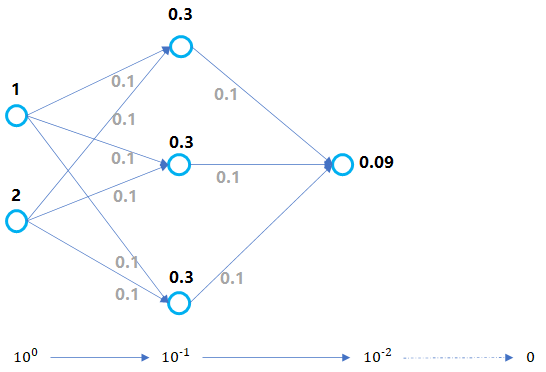

--------

# 附录

- 残差还有两个后继优化版本：
    - DenseNet
        - 引入GooLeNet中堆叠的思维，ResNet是残差块（相加），DenseNet不是残差的概念了（堆叠），因为堆叠过大，所以引入过渡层控制通道（这个思维在GoogLeNet也大量使用）
    - ResNeXt：
        - 引入GoogLeNet的卷积分解的思维，残差块使用卷积分解。

------